<a href="https://colab.research.google.com/github/doodger/dataScience/blob/master/chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from nltk.chat.util import Chat, reflections
import nltk
nltk.download('punkt')
  
!pip install langdetect
from langdetect import detect

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
from google.colab import drive
import os
import json
drive.mount('/content/drive')
os.chdir("/content/drive/My Drive/")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing hundreds of thousands of chat logs.

In [4]:
import re

with open('tnoChatLogs.json') as json_file:
    chatLogs = json.load(json_file) #turns the loaded json file into a dictionary



Look for bans, warns, mute as target data

In [57]:
r = re.compile("(\.warn|\.ban|\.mute)")
list_id = [i for i,item in enumerate(chatLogs['messages']) if re.search(r,item['content'])]
print(list_id)

[226, 2018, 2848, 4846, 6251, 6253, 6852, 6917, 6982, 7007, 8561, 9288, 9387, 9401, 11347, 11824, 13192, 13297, 13324, 15895, 17872, 18552, 22300, 22304, 22306, 22314, 22398, 23034, 29048, 29331, 30064, 30600, 30803, 30936, 30964, 31842, 33192, 37433, 37946, 40471, 40610, 40736, 43668, 43701, 44631, 44683, 46312, 47368, 50564, 51192, 56698, 61527, 62095, 62781, 63950, 66901, 66956, 67226, 69144, 70795, 71465, 71609, 72132, 73372, 76480, 78878, 79376, 79456, 79490, 81545, 85412, 87084, 87178, 88719, 89355, 89357, 90102, 90666, 92700, 94322, 95167, 98540, 98543, 98609, 98840, 99609, 106044, 108697, 110802, 116658, 119757, 120686, 120772, 121904, 121911, 122778, 123335, 129485, 130390, 131587, 132921, 133545, 136736, 139031, 140492, 140587, 141217, 143979, 144773, 145350, 146505, 147098, 147284, 148018, 149001, 149093, 149563, 152578, 153432, 153438, 153441, 157290, 157296, 157341, 158858, 159917, 160752, 160838, 160881, 165264, 165266, 168349, 168642, 171926, 171931, 171997, 176407, 1764

In [58]:
print(chatLogs['messages'][2018]['content'])

.warn @EpochPirate shitposting in general after i warned another comvet not to. come on


In [63]:
print(len(list_id))
print(len(chatLogs['messages']))
print(100*415/462141)

415
462141
0.0897994335062243


look for what the person last said before moderator action

In [69]:
r = re.compile("([Oo]msk)")
list_id = [i for i,item in enumerate(chatLogs['messages']) if re.search(r,item['content'])]
print(len(list_id))

3976


Wordcloud of most common words

In [90]:
import nltk
nltk.download('stopwords')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

stop = stopwords.words('english') + list(string.punctuation)


##We need "username" "speech"
trimmedChatLogs = []

translator = str.maketrans('', '', string.punctuation)

for entry in chatLogs['messages']: #only 1000 message to start with
  s = entry['content'].translate(translator)
  trimmedChatLogs.append({
      'author':entry['author']['name'],
      'message':[i for i in word_tokenize(s) if i.lower() not in stopwords.words('english')], #tokenize and remove stopwords
      'reactions':entry['reactions']
  })

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


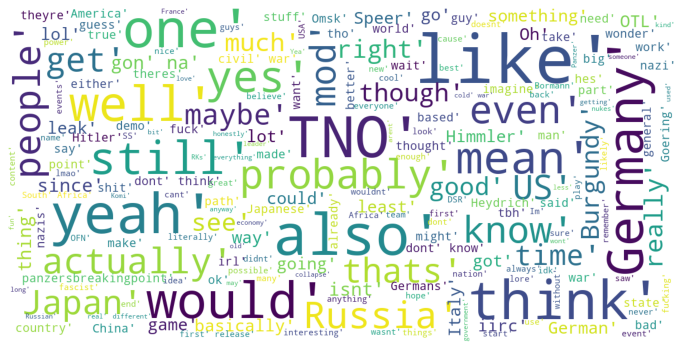

In [91]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)


def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud([entry['message'] for entry in trimmedChatLogs])

In [93]:
trimmedChatLogs[0]['message']

['assume', 'mad', 'bormannspeer', 'post', 'release']

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

countToken = [] #unpacking all token into a list
for entry in trimmedChatLogs:
  for token in entry['message']:
    countToken.append(token)

cv = CountVectorizer(stop_words='english')
X = cv.fit_transform(countToken)
print(cv.get_feature_names())


['000', '0001', '10', '10x', '12th', '17', '1800s', '183', '1850', '1936', '1940', '1957', '1960', '1962', '1970s', '1978', '1982', '1984', '1st', '20', '2000s', '2019_mass_invasion_of_russian_polar_bears', '2020', '2021', '2050', '21', '28', '2n', '30', '3515830', '422', '455866490629914645', '45ish', '48', '50', '60', '60s', '618238251018485781', '90s', '_too_', 'ab', 'able', 'absolute', 'absolutely', 'absorb', 'abysmal', 'accept', 'acceptable', 'accepting', 'accompanied', 'accord', 'according', 'accordingly', 'ace', 'activity', 'actual', 'actuality', 'actually', 'ad', 'add', 'added', 'addicted', 'addiction', 'adding', 'addled', 'adventure', 'afaik', 'affected', 'affinity', 'aggressively', 'ago', 'agree', 'agreement', 'ah', 'aha', 'ahead', 'ahem', 'ai', 'aint', 'air', 'aktau', 'alarms', 'alex', 'alexander', 'aligned', 'allow', 'allowed', 'alluding', 'ally', 'alright', 'alt', 'altered', 'amala', 'ambitious', 'america', 'american', 'americans', 'amerika', 'amerimutt', 'amintore', 'amin

ValueError: ignored

Fix: Apostrophes in word cloud?